# Data Exploration

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import talib
from model.models import TradeModel
from service.trade_analysis import plot_correlation

Nous allons utiliser plusieurs indicateurs  :
- Keltner X,
- ATR,
- EMA12,
- EMA30 
- DONCHIAN.
- Dimensions des bougie
- des corps des bougies
- position du corps sur la bougie
- Distance entre : les moving averages et la keltner
- Distance entre prix courrant et les ema et les keltner

Ceci pour tout les périodes 30 min, 1 heure, 4 h et jour...  Ensuite nous allons donner des données supplémentaires. Dimensions des bougie, des corps des bougies, position du coprs sur la bougie. Nous allons aussi donner quelque distance en pips... Distance entre : les moving averages et la keltner, Distance entre prix courrant et les ema et les keltner.... Nous allons aussi essayer de calcluler (en utilisant le DONCHIAN) la distance pour le prochain gros plateau. Nous allons tout écrire dans le document...  Le but c'est de donner les bonnes données à l'algo pour qu'elle nous donne une prediction SHORT ou long ou le RR est de 1.25 ou plus. Nous allons essayer avec 9 pips lost et 11 pips profit et nous allons augmenter et voir les resultats...  On peu aller justqu'a lost 80 pips win 100 pips...

In [2]:
tm = TradeModel('data/simple/EURUSD_UTC_Daily_Bid_2017.01.01_2017.02.20.csv', name='EURUSD')

tm.df.head()

,Open,High,Low,Close,Volume,KC_M_3,KC_U_3,KC_D_3,Donchian_High_3,Donchian_Low_3,ATR,EMA12,EMA30,cs_size,cs_body_size,cs_body_pos,cs_body_ratio
Time (UTC),,,,,,,,,,,,,,,,,
2017-01-01,1.05148,1.05288,1.05148,1.05230,352.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00140,-0.00082,1.051890,0.000290
2017-01-02,1.05230,1.05260,1.04501,1.04575,87951.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00759,0.00655,1.049025,-0.000220
2017-01-03,1.04575,1.04901,1.03403,1.04174,218296.05,1.04720,1.055190,1.039210,1.05288,1.03403,NaN,NaN,NaN,0.01498,0.00401,1.043745,-0.002225
2017-01-04,1.04174,1.05013,1.03900,1.04971,228092.48,1.04522,1.056453,1.033987,1.05260,1.03403,NaN,NaN,NaN,0.01113,-0.00797,1.045725,-0.001160
2017-01-05,1.04968,1.06153,1.04826,1.06039,273330.28,1.04820,1.061327,1.035073,1.06153,1.03403,0.011742,NaN,NaN,0.01327,-0.01071,1.055035,-0.000140


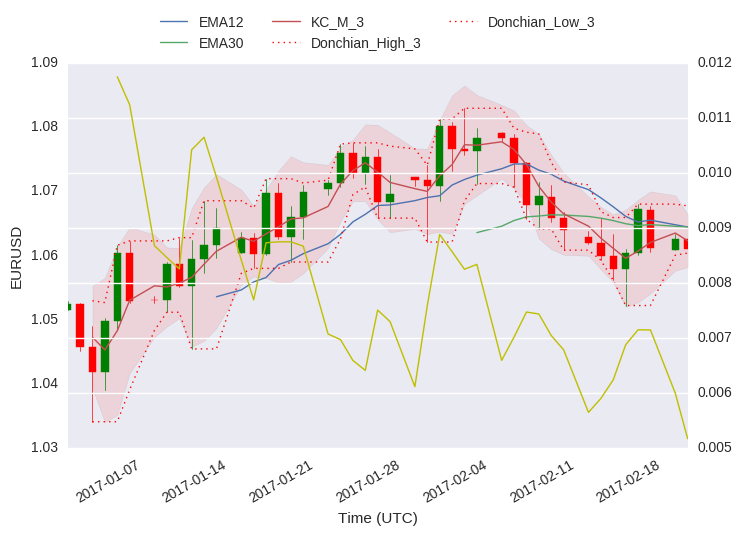

In [3]:
tm.plot()

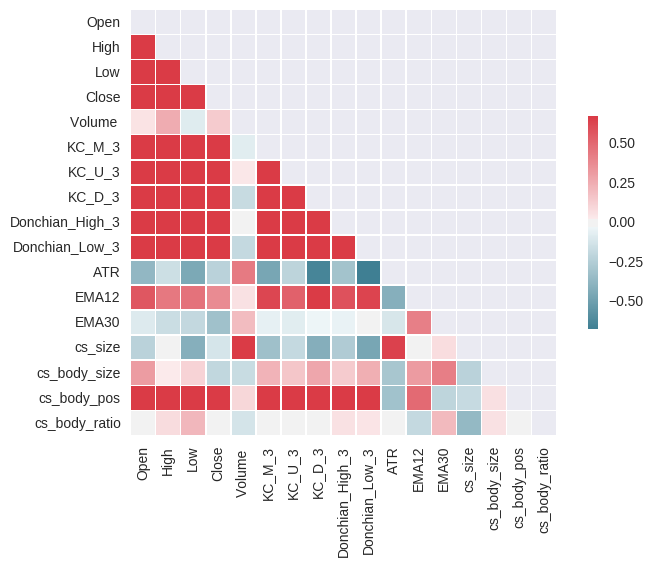

In [4]:
plot_correlation(tm.df)

In [5]:
df = pd.read_csv('data/merged/raw.csv',sep=';')
df.head()
df.columns
corr = df.corr()

In [6]:
corr.head()

,Unnamed: 0,Ask_EURUSD,Bid_EURUSD,AskVolume_EURUSD,BidVolume_EURUSD,spread_EURUSD,spread_volume_EURUSD,Ask_EURGBP,Bid_EURGBP,AskVolume_EURGBP,...,AskVolume_EURCHF,BidVolume_EURCHF,spread_EURCHF,spread_volume_EURCHF,Ask_BRENTCMDUSD,Bid_BRENTCMDUSD,AskVolume_BRENTCMDUSD,BidVolume_BRENTCMDUSD,spread_BRENTCMDUSD,spread_volume_BRENTCMDUSD
Unnamed: 0,1.000000,-0.224676,-0.224651,0.074108,0.070533,-0.019586,0.004490,0.892063,0.892061,0.215281,...,0.169790,0.128940,-0.112131,0.026717,0.799669,0.799603,-0.037671,-0.250483,-0.387363,-0.001560
Ask_EURUSD,-0.224676,1.000000,0.999999,0.021044,0.034174,0.018149,-0.009288,-0.156806,-0.156782,-0.095357,...,-0.063399,-0.040170,0.022954,-0.016093,0.142088,0.142206,0.022647,0.045993,-0.133029,0.017378
Bid_EURUSD,-0.224651,0.999999,1.000000,0.021440,0.034554,0.016554,-0.009265,-0.156768,-0.156742,-0.095085,...,-0.063106,-0.039849,0.021844,-0.016122,0.142115,0.142233,0.022636,0.045988,-0.133120,0.017368
AskVolume_EURUSD,0.074108,0.021044,0.021440,1.000000,0.132369,-0.248140,0.672437,0.091888,0.092296,0.174731,...,0.151722,0.101444,-0.309646,0.034444,0.031471,0.031660,-0.006081,-0.010495,-0.110156,-0.004959
BidVolume_EURUSD,0.070533,0.034174,0.034554,0.132369,1.000000,-0.237332,-0.644631,0.099081,0.099477,0.128629,...,0.090323,0.146782,-0.295434,-0.045657,0.035267,0.035435,-0.000334,-0.004938,-0.101740,0.000415


In [7]:
filter_col = [col for col in corr.columns if ('Ask' in col)]
filter_col

['Ask_EURUSD',
 'AskVolume_EURUSD',
 'Ask_EURGBP',
 'AskVolume_EURGBP',
 'Ask_XAGUSD',
 'AskVolume_XAGUSD',
 'Ask_GBPUSD',
 'AskVolume_GBPUSD',
 'Ask_CHFSGD',
 'AskVolume_CHFSGD',
 'Ask_CADCHF',
 'AskVolume_CADCHF',
 'Ask_GBPCHF',
 'AskVolume_GBPCHF',
 'Ask_EURCHF',
 'AskVolume_EURCHF',
 'Ask_BRENTCMDUSD',
 'AskVolume_BRENTCMDUSD']

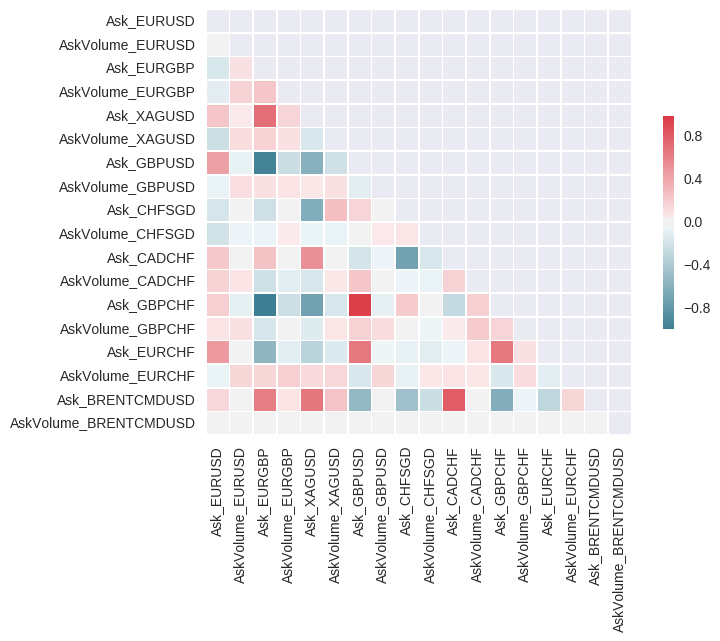

In [8]:
plot_correlation(df[filter_col])